In [5]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [6]:
# Importing modules
import pandas as pd
import os

In [7]:
# Read dataset from github repository

from io import BytesIO
from zipfile import ZipFile
import urllib.request

url = urllib.request.urlopen("https://github.com/Ali-Alameer/NLP/raw/main/data/NIPS%20Papers.zip")

with ZipFile(BytesIO(url.read())) as my_zip_file:
    temp = my_zip_file.open('NIPS Papers/papers.csv')
    
papers = pd.read_csv(temp)

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [8]:
papers.head(0)

,id,year,title,event_type,pdf_name,abstract,paper_text


In [9]:
papers.describe(include = 'all')

,id,year,title,event_type,pdf_name,abstract,paper_text
count,6560.000000,6560.000000,6560,1741,6560,6560,6560
unique,NaN,NaN,6560,3,6560,3244,6553
top,NaN,NaN,Self-Organization of Associative Database and ...,Poster,1-self-organization-of-associative-database-an...,Abstract Missing,Dialog-based Language Learning\n\nJason Weston...
freq,NaN,NaN,1,1505,1,3317,2
mean,3314.574238,2005.343750,NaN,NaN,NaN,NaN,NaN
std,1901.990197,8.481128,NaN,NaN,NaN,NaN,NaN
min,1.000000,1987.000000,NaN,NaN,NaN,NaN,NaN
25%,1675.750000,1999.000000,NaN,NaN,NaN,NaN,NaN
50%,3318.500000,2007.000000,NaN,NaN,NaN,NaN,NaN
75%,4959.250000,2013.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
## Data Cleaning
print(papers.head(0))

Empty DataFrame
Columns: [id, year, title, event_type, pdf_name, abstract, paper_text]
Index: []


In [11]:
# Remove columns that does not relate to the task and select only the 100 sample for quick implementation 
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first five rows of papers
papers.head()

,year,title,abstract,paper_text
2772,2008,Dependence of Orientation Tuning on Recurrent ...,One major role of primary visual cortex (V1) i...,Dependence of Orientation Tuning on Recurrent\...
885,2000,Beyond Maximum Likelihood and Density Estimati...,Abstract Missing,Beyond maximum likelihood and density\nestimat...
3196,2010,Online Classification with Specificity Constra...,We consider the online binary classification p...,Online Classification with Specificity Constra...
3113,2009,Learning models of object structure,We present an approach for learning stochastic...,Learning models of object structure\n\nJoseph ...
4724,2014,General Stochastic Networks for Classification,We extend generative stochastic networks to su...,General Stochastic Networks for Classification...


In [12]:
papers.shape

(100, 4)

In [13]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
                                                                                  
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
                                          
# Print out the two rows of papers
papers['paper_text_processed'].head()

2772    dependence of orientation tuning on recurrent\...
885     beyond maximum likelihood and density\nestimat...
3196    online classification with specificity constra...
3113    learning models of object structure\n\njoseph ...
4724    general stochastic networks for classification...
Name: paper_text_processed, dtype: object

In [14]:
papers.head()

,year,title,abstract,paper_text,paper_text_processed
2772,2008,Dependence of Orientation Tuning on Recurrent ...,One major role of primary visual cortex (V1) i...,Dependence of Orientation Tuning on Recurrent\...,dependence of orientation tuning on recurrent\...
885,2000,Beyond Maximum Likelihood and Density Estimati...,Abstract Missing,Beyond maximum likelihood and density\nestimat...,beyond maximum likelihood and density\nestimat...
3196,2010,Online Classification with Specificity Constra...,We consider the online binary classification p...,Online Classification with Specificity Constra...,online classification with specificity constra...
3113,2009,Learning models of object structure,We present an approach for learning stochastic...,Learning models of object structure\n\nJoseph ...,learning models of object structure\n\njoseph ...
4724,2014,General Stochastic Networks for Classification,We extend generative stochastic networks to su...,General Stochastic Networks for Classification...,general stochastic networks for classification...


In [15]:
# Exploratory Analysis: Make a simple word cloud using the wordcloud package
#import necessary library

import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


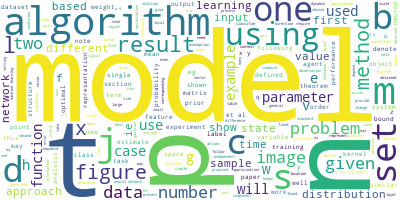

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

#Generate a word cloud
wordcloud.generate(long_string)

#Visualize the word cloud
wordcloud.to_image()

# Prepare text for LDA analysis

In [ ]:
## Test
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sentences = ["This is a sentence.", "And another one."]
word_generator = sent_to_words(sentences)

for word_list in word_generator:
    print(word_list)

In [24]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject','re','edu','use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))
        
def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc))
           if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saleeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dependence', 'orientation', 'tuning', 'recurrent', 'excitation', 'inhibition', 'network', 'model', 'klaus', 'wimmer', 'marcel', 'stimberg', 'robert', 'martin', 'lars', 'schwabe', 'jorge', 'mario', 'james', 'schummers', 'david', 'lyon', 'mriganka', 'sur', 'klaus', 'obermayer', 'bernstein', 'center', 'computational', 'neuroscience']


In [41]:
#list comprehension
#new_list = [expression for item in iterable]
#list comprehension >> for loop

import gensim.corpora as corpora

#Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency (convert each document into a bag-of words)
corpus = [id2word.doc2bow(text) for text in texts]

#View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 6), (11, 3), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 9), (18, 20), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4)]


In [37]:
#data_words contains a list of lists, where each inner list represents a document and contains preprocessed words.

type(data_words)

list

In [42]:
print(data_words[2][:10])

['online', 'classification', 'specificity', 'constraints', 'shie', 'mannor', 'department', 'electrical', 'engineering', 'technion']


# LDA model training

In [43]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"model" + 0.006*"set" + 0.006*"learning" + 0.004*"using" + '
  '0.004*"two" + 0.004*"data" + 0.004*"algorithm" + 0.003*"one" + '
  '0.003*"figure" + 0.003*"models"'),
 (1,
  '0.006*"learning" + 0.005*"set" + 0.005*"data" + 0.004*"model" + '
  '0.004*"algorithm" + 0.003*"one" + 0.003*"number" + 0.003*"training" + '
  '0.003*"models" + 0.003*"based"'),
 (2,
  '0.006*"model" + 0.005*"learning" + 0.005*"time" + 0.005*"data" + '
  '0.004*"algorithm" + 0.004*"two" + 0.004*"set" + 0.004*"one" + 0.003*"using" '
  '+ 0.003*"function"'),
 (3,
  '0.006*"model" + 0.006*"learning" + 0.006*"data" + 0.004*"time" + '
  '0.004*"function" + 0.004*"two" + 0.004*"set" + 0.003*"given" + '
  '0.003*"using" + 0.003*"figure"'),
 (4,
  '0.005*"model" + 0.003*"algorithm" + 0.003*"two" + 0.003*"function" + '
  '0.003*"figure" + 0.003*"learning" + 0.003*"data" + 0.003*"number" + '
  '0.003*"set" + 0.003*"information"'),
 (5,
  '0.006*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"algorithm" + '


In [46]:
import os
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

# Define the file path for saving LDA visualization data
LDAvis_data_filepath = os.path.join('content_' + str(num_topics) + '.pickle')

# Check if the file exists
if not os.path.exists(LDAvis_data_filepath):
    # Prepare the LDA visualization data
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    # Save the prepared data to disk
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, 'content_' + str(num_topics) + '.html')

# Display the prepared LDA visualization
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000025  0.008575       1        1  26.883496
5     -0.003152  0.004947       2        1  14.664035
1     -0.007819 -0.003941       3        1  11.662828
2      0.002480  0.000389       4        1   8.971487
8     -0.004221 -0.000403       5        1   8.872508
9      0.004276 -0.000857       6        1   8.484521
3      0.002267  0.000542       7        1   8.221073
7      0.000428 -0.002241       8        1   8.158590
6     -0.002143 -0.004040       9        1   3.232773
4      0.007859 -0.002972      10        1   0.848689, topic_info=           Term         Freq        Total Category  logprob  loglift
445       model  1314.000000  1314.000000  Default  30.0000  30.0000
841   algorithm   906.000000   906.000000  Default  29.0000  29.0000
1276        set  1062.000000  1062.000000  Default  28.0000  28.0000
300    function   763.000000   763.000000  Default  27.0000  27.0000
392    learning  1249.000000  1249.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
25         also     4.227289   601.624510  Topic10  -6.1441  -0.1888
1221    problem     4.211736   602.092237  Topic10  -6.1478  -0.1933
475      neural     3.881057   505.492738  Topic10  -6.2295  -0.1002
890        case     3.797339   491.882491  Topic10  -6.2514  -0.0947
502         one     4.351817   798.749048  Topic10  -6.1151  -0.4432

[895 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
7301       1  0.593243           a_
16070      3  0.374616  accompanied
10748      1  0.181239    accumbens
10748      2  0.090619    accumbens
10748      3  0.090619    accumbens
...      ...       ...          ...
2812       5  0.141836           zt
2812       6  0.151292           zt
2812       7  0.066190           zt
2812       8  0.037823           zt
2812       9  0.028367           zt

[3689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 3, 9, 10, 4, 8, 7, 5])